### Load AG news  + train/dev/test splits

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import load_dataset

SEED = 10

dataset = load_dataset("sh0416/ag_news")

df_train = pd.DataFrame(dataset['train'])
df_test  = pd.DataFrame(dataset['test'])

print("Train samples:", len(df_train))
print("Test samples: ", len(df_test))

# Make dev from train
df_train, df_dev = train_test_split(
    df_train,
    test_size=0.1,
    random_state=SEED,
    stratify=df_train["label"] # Ensure equally distributed categories across splits
)

print("Train:", len(df_train))
print("Test: ", len(df_test))
print("Dev:  ", len(df_dev))


Train samples: 120000
Test samples:  7600
Train: 108000
Test:  7600
Dev:   12000


### Calculate importance of words in articles via TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    lowercase=True, # N
    stop_words='english', # Remove common english words
    # ngram_range=(1,1)    # only unigrams
)

# Generate vector form of words
for df in [df_train, df_dev, df_test]:
    df["text"] = df["title"] + " " + df["description"]
X_train = tfidf.fit_transform(df_train['text'])

# Transform words to vector form
X_dev   = tfidf.transform(df_dev['text'])
X_test  = tfidf.transform(df_test['text'])

# Parallel Lists of Category of news articles00000000
y_train = df_train['label']
y_dev   = df_dev['label']
y_test  = df_test['label']


### Logistical Regression Model

In [4]:
# https://chatgpt.com/c/698eee55-0fb8-832f-9408-c060a6dfce49
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

logistic_model = LogisticRegression(
	max_iter = 1000, # Number of steps in gradient descent
	random_state=SEED,
)

logistic_model.fit(X_train, y_train)

y_dev_pred_logistic_model = logistic_model.predict(X_dev)

print('Dev set - linear svm:')
print('accuracy', accuracy_score(y_dev, y_dev_pred_logistic_model))
print('f1 marco', f1_score(y_dev, y_dev_pred_logistic_model, average='macro'))

Dev set - linear svm:
accuracy 0.9084166666666667
f1 marco 0.9082792174338483


### Support Vector Machine
Making a linear svm model

In [5]:
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=5000, random_state=SEED)
svm.fit(X_train, y_train)

y_dev_pred_svm = svm.predict(X_dev)
print('dev set - linear svm:')
print('accuracy', accuracy_score(y_dev, y_dev_pred_svm))
print('macro f1', f1_score(y_dev, y_dev_pred_svm, average='macro'))

dev set - linear svm:
accuracy 0.9091666666666667
macro f1 0.9090222632190275


Testing Accuracy:
accuracy 0.9048684210526315
f1 macro 0.9046627818346372
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.98      0.96      1900
           3       0.87      0.87      0.87      1900
           4       0.88      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



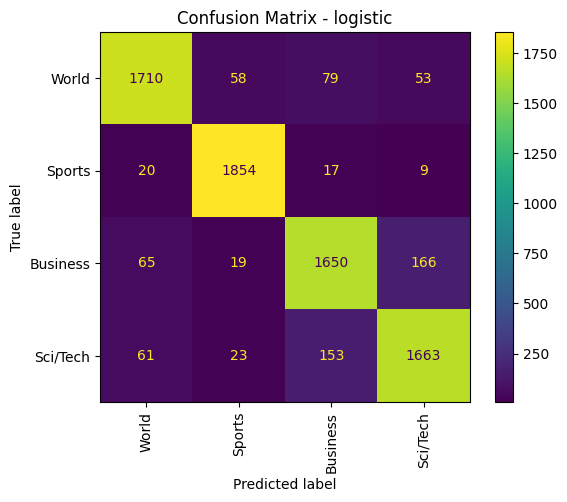

linear svm - test set


In [6]:
y_test_pred_lr = logistic_model.predict(X_test)
print('Testing Accuracy:')
print('accuracy', accuracy_score(y_test, y_test_pred_lr))
print('f1 macro', f1_score(y_test, y_test_pred_lr, average='macro'))
print(classification_report(y_test, y_test_pred_lr))

cm_lr = confusion_matrix(y_test, y_test_pred_lr)
disp_lr = ConfusionMatrixDisplay(cm_lr, display_labels=['World', 'Sports', 'Business', 'Sci/Tech'])
disp_lr.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix - logistic')
plt.show()

y_test_pred_svm = svm.predict(X_test)
print('linear svm - test set')